In [113]:
import pandas as pd
import seaborn as sns
from glob import glob

In [114]:
result_files = glob('../results/*.csv')
results = pd.DataFrame()

for filepath in result_files:
    data = pd.read_csv(filepath, header=0, index_col=None)
    results = pd.concat([results, data])
    
indexes = results['evaluator'].apply(lambda x: x != 'inverse_square')
results = results.loc[indexes, :]
# results

In [122]:
print("Bernardo, please note that in the paper we should only show f1 score, not accuracy, precision or recall.")
print("Also, in the paper there is no dist or evaluator parameters. All algorithms use euclidian distance, and there is two algorithms, KNN with parameter k, and WN without parameters.")

mean_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).mean()
std_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).std()
std_results = std_results.drop(['cv', 'k', 'n_folds', 'fold'], axis=1)
std_results.columns = ['accuracy_std', 'precision_std', 'recall_std', 'f1_std']

summary = pd.concat([mean_results, std_results], axis=1)

display(summary)

Bernardo, please note that in the paper we should only show f1 score, not accuracy, precision or recall.
Also, in the paper there is no dist or evaluator parameters. All algorithms use euclidian distance, and there is two algorithms, KNN with parameter k, and WN without parameters.


cv       k  \
dataset            k_label dist      evaluator                              
breast_cancer      5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   217.0   
                                     majority                 2.0   217.0   
                   sqrt(n) euclidean majority                 2.0    14.0   
car_evaluation     5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  1555.0   
                                     majority                 2.0  1555.0   
                   sqrt(n) euclidean majority                 2.0    39.0   
dis                5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3339.0   
                                     majority                 2.0  3339.0   
                   sqrt(n) euclidean majority                 2.0    57.0   
iris               5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   117.0   
                                     majority                 2.0   117.0   
                   sqrt(n) euclidean majority                 2.0    10.0   
lupus              5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0    69.0   
                                     majority                 2.0    69.0   
                   sqrt(n) euclidean majority                 2.0     8.0   
spambase           5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3789.0   
                                     majority                 2.0  3789.0   
                   sqrt(n) euclidean majority                 2.0    61.0   
wine_quality_white 5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3564.0   
                                     majority                 2.0  3564.0   
                   sqrt(n) euclidean majority                 2.0    59.0   

                                                              n_folds  fold  \
dataset            k_label dist      evaluator                                
breast_cancer      5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
car_evaluation     5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
dis                5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
iris               5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
lupus              5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
spambase      

In [116]:
# This table should not be part of the paper, because it enfacizes the best method in each domain...
# But that is not what we want to show. Our algorithm is not the best, it just has comparable performance.

# indexes = summary.groupby('dataset').idxmax()['f1']
# best_f1 = summary.loc[indexes, :]
# best_f1

In [117]:
# This table should not be part of the paper, because it enfacizes the comparison when k=n...
# Our objetive was to have method comparable against the best values of k, and k=n is not the best usually...
# So it is unfair to we compare it exclusively against majority with k=n.

# indexes = summary.loc[pd.IndexSlice[:,'n',:,:], :].groupby('dataset').idxmax()['f1']
# best_f1_with_n = summary.loc[indexes, :]
# best_f1_with_n

In [118]:
# This table should not be part of the paper because it shows already shown information.

# indexes = summary.loc[pd.IndexSlice[:,:,:,'averaged_inverse_square'], :].groupby('dataset').idxmax()['f1']
# best_f1_with_is = summary.loc[indexes, :]
# best_f1_with_is

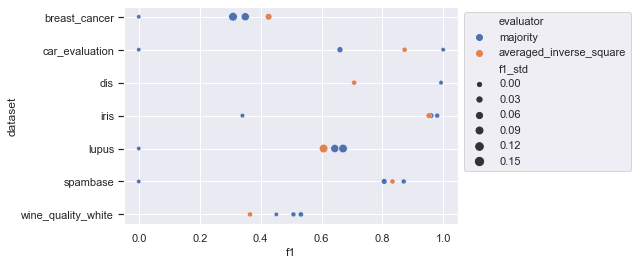

In [119]:
data = summary.reset_index()
ax = sns.scatterplot(data=data, x='f1', y='dataset', size='f1_std', hue='evaluator')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [120]:
# The scatter plot is good enough, we don't need this other graph. - Frederico.

# data = summary.reset_index()
# ax = sns.boxplot(data=data, x='dataset', y='f1', hue='evaluator')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [121]:
# I was thinking, Bernardo...
# These graphs are also not necessary, and neither are good: I don't like the bars ordering (sqrt n should be in the middle), also don't like the titles appearences: namely, the title of both axes (showing their units), and the domain name.
# I think we should keep only the scatter-plot in the paper
# - Frederico

# import matplotlib.pyplot as plt
# from math import log, inf

# def lli0(x):
#     if x == 0:
#         return -inf
#     if x == 1:
#         return inf
#     return log(x) - log(1 - x)

# ticks = [0.01, 0.1, 0.5, 0.9, 0.99]
# minor_ticks = [0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.95]

# data = summary.reset_index()
# sns.set_style("whitegrid")
# sns.set(rc={"ytick.left" : True})

# # pd.set_option('display.max_columns', None)
# # pd.set_option('display.max_rows', None)

# data['lli0f1'] = data['f1'].apply(lli0)
# data['lli0f1'] -= lli0(min(ticks))

# fig, axes = plt.subplots(4, 2, figsize=(18, 18))
# fig.subplots_adjust(hspace=.4)

# k = 0
# datasets = list(set(data['dataset']))

# for i in range(4):
#     for j in range(2):
#         if k < len(datasets):
#             dt = datasets[k]
#             indexes = data['dataset'].apply(lambda d: d == dt)
            
#             axes[i, j].set_title(dt)
#             g = sns.barplot(ax=axes[i, j], data=data.loc[indexes, :], x='evaluator', y='lli0f1', hue='k_label', bottom=lli0(min(ticks)))
#             axes[i, j].set(ylim=(lli0(min(ticks)), lli0(max(ticks))))
#             axes[i, j].set_yticks(ticks=list(map(lli0, ticks)), labels=list(map(lambda x: f'{x:.0%}', ticks)))
#             axes[i, j].set_yticks(ticks=list(map(lli0, minor_ticks)), minor = True)
            
#             if j == 1:
#                 sns.move_legend(axes[i, j], "upper left", bbox_to_anchor=(1, 1))
#             else:
#                 plt.legend([],[], frameon=False)
                
#             k += 1
#         else:
#             fig.delaxes(axes[i, j])
